## Algorithm for computing natural cubic splines
Cubic splines have polynomial pieces of the form ${\displaystyle P_{i}(x)=a_{i}+b_{i}(x-x_{i})+c_{i}(x-x_{i})^{2}+d_{i}(x-x_{i})^{3}.}$ Given ${\displaystyle k+1}$ coordinates ${\displaystyle (x_{0},y_{0}),(x_{1},y_{1}),\dots ,(x_{k},y_{k}),}$  we find ${\displaystyle k}$ polynomials ${\displaystyle P_{i}(x),}$ which satisfy for ${\displaystyle 1\leq i\leq k-1}$:

* ${\displaystyle P_{0}(x_{0})=y_{0}\quad }$ and ${\displaystyle \quad P_{i-1}(x_{i})=y_{i}=P_{i}(x_{i}),}$
* ${\displaystyle P'_{i-1}(x_{i})=P'_{i}(x_{i}),}$
* ${\displaystyle P''_{i-1}(x_{i})=P''_{i}(x_{i}),}$
* ${\displaystyle P''_{0}(x_{0})=P''_{k-1}(x_{k})=0.}$

One such polynomial ${\displaystyle P_{i}}$ is given by a 5-tuple ${\displaystyle (a,b,c,d,x)}$ where ${\displaystyle a,b,c\,}$  and ${\displaystyle d\,}$, correspond to the coefficients as used above and ${\displaystyle x}$ denotes the variable over the appropriate domain ${\displaystyle [x_{i},x_{i+1}]}$

### Computation of Natural Cubic Splines:
Input: a set of ${\displaystyle k+1}$ coordinates
Output: a spline as a set of polynomial pieces, each represented by a 5-tuple.

1. Create a new array a of size k + 1, and for ${\displaystyle i=0,\ldots ,k}$ set ${\displaystyle a_{i}=y_{i}}$
2. Create new arrays b, d and μ each of size k
3. Create a new array h of size k and for ${\displaystyle i=0,\ldots ,k-1}$ set ${\displaystyle h_{i}=x_{i+1}-x_{i}}$
4. Create a new array α of size k-1 and for ${\displaystyle i=1,\ldots ,k-1}$ set ${\displaystyle \alpha _{i}={\tfrac {3}{h_{i}}}(a_{i+1}-a_{i})-{\tfrac {3}{h_{i-1}}}(a_{i}-a_{i-1})}$
5. Create new arrays c, l, and z each of size ${\displaystyle k+1}$.
6. Set ${\displaystyle l_{0}=1,\;\mu _{0}=z_{0}=0}$
7. For ${\displaystyle i=1,\ldots ,k-1\,}$
    1. Set ${\displaystyle l_{i}=2(x_{i+1}-x_{i-1})-h_{i-1}\mu _{i-1}.}$
    2. Set ${\displaystyle \mu _{i}={\tfrac {h_{i}}{l_{i}}}.}$
    3. Set ${\displaystyle z_{i}={\tfrac {\alpha _{i}-h_{i-1}z_{i-1}}{l_{i}}}.}$
8. Set ${\displaystyle l_{k}=1;z_{k}=c_{k}=0.}$
9. For ${\displaystyle j=k-1,k-2,\ldots ,0}$
    1. Set ${\displaystyle c_{j}=z_{j}-\mu _{j}c_{j+1}}$
    2. Set ${\displaystyle b_{j}={\tfrac {a_{j+1}-a_{j}}{h_{j}}}-{\tfrac {h_{j}(c_{j+1}+2c_{j})}{3}}}$
    3. Set ${\displaystyle d_{j}={\tfrac {c_{j+1}-c_{j}}{3h_{j}}}.}$
10. Create the spline as a new set of polynomials and call it output_set. Populate it with k 5-tuples for the polynomials P.
11. For ${\displaystyle i=0,\ldots ,k-1}$
    1. Set Pi,a = ai
    2. Set Pi,b = bi
    3. Set Pi,c = ci
    4. Set Pi,d = di
    5. Set Pi,x = xi
12. Output output_set

[[ 6.    1.  ]
 [-3.5  -0.5 ]
 [ 0.    1.5 ]
 [ 0.25 -0.25]
 [ 3.    5.  ]]


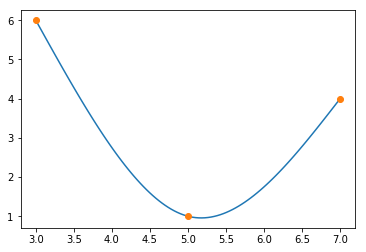

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#x = np.array([1,2,3,4,5,6,7], dtype=float)
#y = np.array([2,1,2,3,2,1,0], dtype=float)
x = np.array([3,5,7], dtype=float)
y = np.array([6,1,4], dtype=float)
# 1
k = x.size - 1
a = y
assert a.size == k + 1

# 2
b = np.full(k, np.inf)
d = np.full(k, np.inf)
mu = np.full(k, np.inf)
assert b.size == d.size == mu.size == k

# 3
h = (np.roll(x,-1) - x)[:k]
assert h.size == k

# 4
alpha = np.full(k, np.inf)
for i in range(k):
    if i == 0:
        continue
    alpha[i] = 3 / h[i] * (a[i+1] - a[i]) - 3 / h[i-1] * (a[i] - a[i-1])

assert alpha.size == k
assert alpha[0] == np.inf

# 5
c = np.full(k+1, np.inf)
l = np.full(k+1, np.inf)
z = np.full(k+1, np.inf)

# 6
l[0] = 1
mu[0] = z[0] = 0

# 7
for i in range(1,k):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1])/l[i]

# 8
l[k] = 1
z[k] = c[k] = 0

# 9
for j in range(k-1,-1,-1):    
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# 10 
output_set = np.full((5,k), np.inf)

# 11
for i in range(k):
    output_set[0,i] = a[i]
    output_set[1,i] = b[i]
    output_set[2,i] = c[i]
    output_set[3,i] = d[i]
    output_set[4,i] = x[i]

print(output_set)
#output_set = np.array([[6,1],[-7/2, -1/2], [0,3/2],[1/4, -1/4],[3,5]])
#print(output_set)

# plot data
X = np.linspace(start=x[0], stop=x[-1], num=100)
Y = np.full(X.size, np.inf)
idx = 0
for k in X:
    for j in range(len(x)-1):
        if x[j] <= k < x[j+1]:
            i = j
            break
    diff = k - output_set[4,i]
    Y[idx] = output_set[0,i] + output_set[1,i] * (diff) + output_set[2,i] * (diff)**2 + output_set[3,i] * (diff)**3
    idx+=1

plt.figure(1)
plt.plot(X, Y)
plt.plot(x, y, 'o')
plt.show()

# B-Spline, Aperiodic

The trick was to either intercept the coefficients, i.e. element 1 of the tuple returned by scipy.interpolate.splrep, and to replace them with the control point values before handing them to scipy.interpolate.splev, or, if you are fine with creating the knots yourself, you can also do without splrep and create the entire tuple yourself.

What is strange about this all, though, is that, according to the manual, splrep returns (and splev expects) a tuple containing, among others, a spline coefficients vector with one coefficient per knot. However, according to all sources I found, a spline is defined as the weighted sum of the N_control_points basis splines, so I would expect the coefficients vector to have as many elements as control points, not knot positions.

In fact, when supplying splrep's result tuple with the coefficients vector modified as described above to scipy.interpolate.splev, it turns out that the first N_control_points of that vector actually are the expected coefficients for the N_control_points basis splines. The last degree + 1 elements of that vector seem to have no effect. I'm stumped as to why it's done this way. If anyone can clarify that, that would be great. Here's the source that generates the above plots:

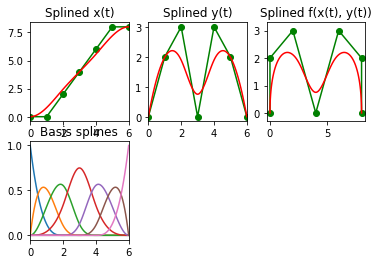

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

# Collected Points
points = [[0, 0], [0, 2], [2, 3], [4, 0], [6, 3], [8, 2], [8, 0]];
points = np.array(points)
x = points[:,0]
y = points[:,1]

# Knots
t = range(len(points))
ipl_t = np.linspace(0.0, len(points) - 1, 100)

# Find B-spline representation of 1-D curve
x_tup = si.splrep(t, x, k=3)
y_tup = si.splrep(t, y, k=3)

x_list = list(x_tup)
xl = x.tolist()
x_list[1] = xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = yl + [0.0, 0.0, 0.0, 0.0]

# Given knots and coefficents evaluate the value of the smoothing polynomial and its derivatives
x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

#==============================================================================
# Plot
#==============================================================================

fig = plt.figure()

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(7):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i)
plt.xlim([0.0, max(t)])
plt.title('Basis splines')
plt.show()

# B-Spline, Periodic

Now in order to create a closed curve like the following, which is another Mathematica example that can be found on the web, Closed b-spline curve

it is necessary to set the per parameter in the splrep call, if you use that. After padding the list of control points with degree+1 values at the end, this seems to work well enough, as the images show.

The next peculiarity here, however, is that the first and the last degree elements in the coefficients vector have no effect, meaning that the control points must be put in the vector starting at the second position, i.e. position 1. Only then are the results ok. For degrees k=4 and k=5, that position even changes to position 2.

Here's the source for generating the closed curve:

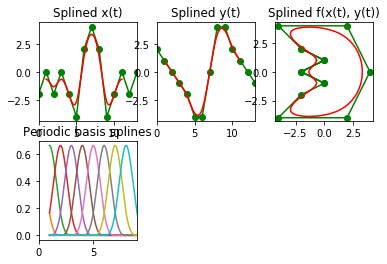

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

points = [[-2, 2], [0, 1], [-2, 0], [0, -1], [-2, -2], [-4, -4], [2, -4], [4, 0], [2, 4], [-4, 4]]

degree = 3

points = points + points[0:degree + 1]
points = np.array(points)
n_points = len(points)
x = points[:,0]
y = points[:,1]

t = range(len(x))
ipl_t = np.linspace(1.0, len(points) - degree, 1000)

x_tup = si.splrep(t, x, k=degree, per=1)
y_tup = si.splrep(t, y, k=degree, per=1)
x_list = list(x_tup)
xl = x.tolist()
x_list[1] = [0.0] + xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = [0.0] + yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

#==============================================================================
# Plot
#==============================================================================

fig = plt.figure()

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(n_points - degree - 1):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i)
plt.xlim([0.0, 9.0])
plt.title('Periodic basis splines')

plt.show()

# B-Spline, Periodic, Higher Degree

Lastly, there is an effect that I can not explain either, and this is when going to degree 5, there is a small discontinuity that appears in the splined curve, see the upper right panel, which is a close-up of that 'half-moon-with-nose-shape'. The source code that produces this is listed below.

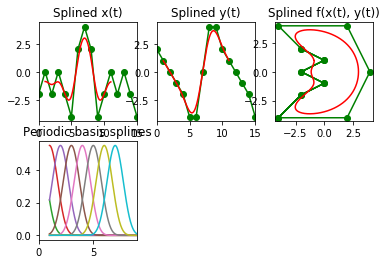

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

points = [[-2, 2], [0, 1], [-2, 0], [0, -1], [-2, -2], [-4, -4], [2, -4], [4, 0], [2, 4], [-4, 4]]

degree = 5

points = points + points[0:degree + 1]
points = np.array(points)
n_points = len(points)
x = points[:,0]
y = points[:,1]

t = range(len(x))
ipl_t = np.linspace(1.0, len(points) - degree, 1000)

knots = np.linspace(-degree, len(points), len(points) + degree + 1).tolist()

xl = x.tolist()
coeffs_x = [0.0, 0.0] + xl + [0.0, 0.0, 0.0]

yl = y.tolist()
coeffs_y = [0.0, 0.0] + yl + [0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, (knots, coeffs_x, degree))
y_i = si.splev(ipl_t, (knots, coeffs_y, degree))

#==============================================================================
# Plot
#==============================================================================

fig = plt.figure()

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(n_points - degree - 1):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_i = si.splev(ipl_t, (knots, vec, degree))
    plt.plot(ipl_t, x_i)
plt.xlim([0.0, 9.0])
plt.title('Periodic basis splines')

plt.show()

# Algorithm

$N-Metric = \sum_{x,y} (A(x,y) - B(x,y))^2 + c * Distance $

where

$Distance = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

1. Calculate the optimal affine transform
2. Initialize the control points P
3. Repeat
    1. Calculate N-Metric to the non-rigid transform parameter P: 
    
    \begin{equation}
        {\nabla c = \tfrac{\delta {N(\theta, P^l})}{ \delta{P^l}}}$
    \end{equation}
    2. while ${|{\nabla c}| > \epsilon}$ do
        
      Recalculate the control points $P = P + \mu \tfrac{\nabla c}{||\nabla c||}$
      
      Recalculate the gradient vector $\nabla c$
    
4. Increase the control points resulution by calculating new control points $P^{l+1}$ from $P^l$
5. Increase the image resolution
6. Unitil finest level of resolution is reached.
    


In [7]:
import itk
import sys

fixedImageFile = sys.argv[1]
movingImageFile = sys.argv[2]
outputImageFile = sys.argv[3]
differenceImageAfterFile = sys.argv[4]
differenceImageBeforeFile = sys.argv[5]

PixelType = itk.ctype('float')

fixedImage = itk.imread(fixedImageFile, PixelType)
movingImage = itk.imread(movingImageFile, PixelType)

Dimension = fixedImage.GetImageDimension()
FixedImageType = itk.Image[PixelType, Dimension]
MovingImageType = itk.Image[PixelType, Dimension]

TransformType = itk.TranslationTransform[itk.D, Dimension]
initialTransform = TransformType.New()

# Optimizer
optimizer = itk.RegularStepGradientDescentOptimizerv4.New(
        LearningRate=4,
        MinimumStepLength=0.001,
        RelaxationFactor=0.5,
        NumberOfIterations=200)

# Metric
metric = itk.MeanSquaresImageToImageMetricv4[
    FixedImageType, MovingImageType].New()

registration = itk.ImageRegistrationMethodv4.New(FixedImage=fixedImage,
        MovingImage=movingImage,
        Metric=metric,
        Optimizer=optimizer,
        InitialTransform=initialTransform)

movingInitialTransform = TransformType.New()
initialParameters = movingInitialTransform.GetParameters()
initialParameters[0] = 0
initialParameters[1] = 0
movingInitialTransform.SetParameters(initialParameters)
registration.SetMovingInitialTransform(movingInitialTransform)

identityTransform = TransformType.New()
identityTransform.SetIdentity()
registration.SetFixedInitialTransform(identityTransform)

registration.SetNumberOfLevels(1)
registration.SetSmoothingSigmasPerLevel([0])
registration.SetShrinkFactorsPerLevel([1])

registration.Update()

transform = registration.GetTransform()
finalParameters = transform.GetParameters()
translationAlongX = finalParameters.GetElement(0)
translationAlongY = finalParameters.GetElement(1)

numberOfIterations = optimizer.GetCurrentIteration()

bestValue = optimizer.GetValue()

print("Result = ")
print(" Translation X = " + str(translationAlongX))
print(" Translation Y = " + str(translationAlongY))
print(" Iterations    = " + str(numberOfIterations))
print(" Metric value  = " + str(bestValue))

CompositeTransformType = itk.CompositeTransform[itk.D, Dimension]
outputCompositeTransform = CompositeTransformType.New()
outputCompositeTransform.AddTransform(movingInitialTransform)
outputCompositeTransform.AddTransform(registration.GetModifiableTransform())

resampler = itk.ResampleImageFilter.New(
                Input=movingImage,
                Transform=outputCompositeTransform,
                UseReferenceImage=True,
                ReferenceImage=fixedImage)
resampler.SetDefaultPixelValue(100)

OutputPixelType = itk.ctype('unsigned char')
OutputImageType = itk.Image[OutputPixelType, Dimension]

caster = itk.CastImageFilter[FixedImageType,
        OutputImageType].New(Input=resampler)

writer = itk.ImageFileWriter.New(Input=caster, FileName=outputImageFile)
writer.SetFileName(outputImageFile)
writer.Update()

difference = itk.SubtractImageFilter.New(Input1=fixedImage,
        Input2=resampler)

intensityRescaler = itk.RescaleIntensityImageFilter[FixedImageType,
        OutputImageType].New(
            Input=difference,
            OutputMinimum=itk.NumericTraits[OutputPixelType].min(),
            OutputMaximum=itk.NumericTraits[OutputPixelType].max())

resampler.SetDefaultPixelValue(1)
writer.SetInput(intensityRescaler.GetOutput())
writer.SetFileName(differenceImageAfterFile)
writer.Update()

resampler.SetTransform(identityTransform)
writer.SetFileName(differenceImageBeforeFile)
writer.Update()

IndexError: list index out of range